# Teams: Data Cleaning and Analysis

First, we import the libraries that we will use during the analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Next, we import and explore the dataset that we created when scarping our source website.

In [2]:
scores = pd.read_csv(r"C:\Users\Honza Stuchlík\Documents\IES\Data Processing in Python\Czech-Football-League\scores.csv")
scores

,Game Week,Weekday,Date,Time,Home Team,Score,Away Team,Attendance,Venue,Referee
0,1.0,Fri,2015-07-24,17:30,Viktoria Plzeň,2–1,Slavia Prague,"11,233",Doosan Arena,Pavel Franek
1,1.0,Fri,2015-07-24,19:00,Vysočina Jihlava,0–0,Sparta Prague,"3,894",Stadion v Jiráskově ulici,Tomas Kocourek
2,1.0,Sat,2015-07-25,17:00,Příbram,2–3,Jablonec,"4,182",Energon Aréna,Pavel Královec
3,1.0,Sat,2015-07-25,17:00,Slovácko,4–3,Dukla Prague,"3,726",Městský fotbalový stadion Miroslava Vale...,Zbyněk Proske
4,1.0,Sat,2015-07-25,17:00,Zbrojovka Brno,2–1,Baník Ostrava,"5,326",Městský fotbalový stadion Srbská,Libor Kovařík
...,...,...,...,...,...,...,...,...,...,...
1732,34.0,Fri,2021-05-28,NaN,Mladá Boleslav,NaN,Bohemians 1905,NaN,Adidas Aréna,NaN
1733,34.0,Fri,2021-05-28,NaN,Slovan Liberec,NaN,Sigma Olomouc,NaN,Stadion u Nisy,NaN
1734,34.0,Fri,2021-05-28,NaN,Slovácko,NaN,Fastav Zlín,NaN,Městský fotbalový stadion Miroslava Vale...,NaN
1735,34.0,Fri,2021-05-28,NaN,Slavia Prague,NaN,České Budĕjov.,NaN,Sinobo Stadium,NaN


# Data Cleaning

As we can see, the data requires cleaning. We want to get rid of NaN values in the column "Score" so that we have only matches that have already been played. We also split the scores into two columns - home and away team goals to be able to do meaningful computations with the values.

In [3]:
scores_nona = scores[scores['Score'].notna()].copy()
scores_nona.loc[:, "Home Team Goals"] = scores_nona['Score'].astype(str).str[0].astype(int)
scores_nona.loc[:, "Away Team Goals"] = scores_nona['Score'].astype(str).str[2].astype(int)
scores_clean = scores_nona[["Date", "Weekday", "Time", "Home Team", "Away Team", "Home Team Goals", "Away Team Goals", "Venue", "Referee"]]
scores_clean

,Date,Weekday,Time,Home Team,Away Team,Home Team Goals,Away Team Goals,Venue,Referee
0,2015-07-24,Fri,17:30,Viktoria Plzeň,Slavia Prague,2,1,Doosan Arena,Pavel Franek
1,2015-07-24,Fri,19:00,Vysočina Jihlava,Sparta Prague,0,0,Stadion v Jiráskově ulici,Tomas Kocourek
2,2015-07-25,Sat,17:00,Příbram,Jablonec,2,3,Energon Aréna,Pavel Královec
3,2015-07-25,Sat,17:00,Slovácko,Dukla Prague,4,3,Městský fotbalový stadion Miroslava Vale...,Zbyněk Proske
4,2015-07-25,Sat,17:00,Zbrojovka Brno,Baník Ostrava,2,1,Městský fotbalový stadion Srbská,Libor Kovařík
...,...,...,...,...,...,...,...,...,...
1556,2021-01-27,Wed,18:00,Fastav Zlín,Slavia Prague,2,6,Stadion Letná,Pavel Franek
1558,2021-01-30,Sat,14:00,Teplice,Karviná,2,2,Na Stínadlech,Ondřej Lerch
1559,2021-01-30,Sat,16:00,Slovácko,České Budĕjov.,0,0,Městský fotbalový stadion Miroslava Vale...,Miroslav Zelinka
1560,2021-01-30,Sat,16:00,FK Pardubice,Příbram,1,0,Stadion Ďolíček,Paval Julínek


In [4]:
#scores_clean.to_csv(r"C:\Users\Honza Stuchlík\Documents\IES\Data Processing in Python\Czech-Football-League\scores_clean.csv", index = False)

# Data Analysis

In this notebook we analayze **goals** and **match results**. Each of these has its own class with a set of functions that can be called to analyze different properties of our scores dataset.

## Goals

We are interested in the numbers of goals scored by teams playing on their home pitch and away and more specifically we want to compare the values to see whether teams are stronger when they play at home, i.e. if they score more goals at home and what is the difference between goals scored at home and away. For the purpose of analysing goals we wrote a class **Goals_summary**. The class takes three arguments: 1. **scores_df** (a dataframe with scores), 2. **start_date** (starting date of the time period that we want to analyze), 3. **end_date** (analogically, we specify the end of the time period). 7 functions can be called. The first function **overall** returns the numbers of goals in home and away games as well as the difference between home and away goals scored by all teams in the specified time period. The functions **home_pivot**, **away_pivot** and **total_pivot** return sorted pivot tables that show the distribution of goals scored at home, away or both together by each team. The function **ha_ratio_pivot** returns a pivot table where the home/away ratio represents the fraction of goals scored at home and away by each team. The functions **barplot** and **piechart** with the argument **stat** use Matplotlib to visualize numbers of goals scored by each team at home (stat = "Home Team Goals"), away (stat = "Away Team Goals") or in total (stat = "Total Goals"). Barplot can be displayed with horizontal bars or with vertical bars. This is determined by the logical argument **vertical**, which is set to True by default. 

In [5]:
class Goals_summary:
    
    def __init__(self, scores_df, start_date, end_date):
        helping_data = scores_df.copy()
        helping_data['Date'] = pd.to_datetime(helping_data['Date'])
        mask = (helping_data['Date'] > start_date) & (helping_data['Date'] <= end_date)
        scores_clean = helping_data.loc[mask]
        self.scores_clean = scores_clean
    
    def overall(self):
        total_home_goals = sum(self.scores_clean["Home Team Goals"])
        total_away_goals = sum(self.scores_clean["Away Team Goals"])
        goal_difference = total_home_goals - total_away_goals
        total_goals = total_home_goals + total_away_goals
        average_home_goals = sum(self.scores_clean["Home Team Goals"]) / len(self.scores_clean["Home Team Goals"])
        average_away_goals = sum(self.scores_clean["Away Team Goals"]) / len(self.scores_clean["Away Team Goals"])
        average_total_goals = (average_home_goals + average_away_goals) / 2
        print("Total Home Goals: " + str(total_home_goals))
        print("Total Away Goals: " + str(total_away_goals))
        print("Home and Away Goals Difference: " + str(goal_difference))
        print("Total Goals: " + str(total_goals))
        print("Average Home Goals per Game: " + str(round(average_home_goals,2)))
        print("Average Away Goals per Game: " + str(round(average_away_goals,2)))
        print("Average Total Goals per Game: " + str(round(average_total_goals,2)))
        
    
    def home_pivot(self):
        home_pivot_table = pd.pivot_table(self.scores_clean, values = "Home Team Goals", index = "Home Team", aggfunc = np.sum)
        home_pivot_df = pd.DataFrame(home_pivot_table)
        home_pivot_df = home_pivot_df.sort_values(by = "Home Team Goals", ascending = False)
        return home_pivot_df
    
    def away_pivot(self):
        away_pivot_table = pd.pivot_table(self.scores_clean, values = "Away Team Goals", index = "Away Team", aggfunc = np.sum)
        away_pivot_df = pd.DataFrame(away_pivot_table)
        away_pivot_df = away_pivot_df.sort_values(by = "Away Team Goals", ascending = False)
        return away_pivot_df
    
    def total_pivot(self):
        home_pivot_df = self.home_pivot()
        away_pivot_df = self.away_pivot()
        home_pivot_df["Team"] = home_pivot_df.index
        away_pivot_df["Team"] = away_pivot_df.index
        goals_df = pd.merge(home_pivot_df, away_pivot_df, on = "Team")
        goals_df["Total Goals"] = goals_df["Home Team Goals"] + goals_df["Away Team Goals"]
        goals_df = goals_df.reindex(columns=["Team", "Home Team Goals", "Away Team Goals", "Total Goals"])
        goals_df_sortedby_total = goals_df.sort_values(by = "Total Goals", ascending = False)
        goals_df_sortedby_total = goals_df_sortedby_total.set_index("Team")
        return goals_df_sortedby_total
    
    def ha_ratio_pivot(self):
        home_pivot_df = self.home_pivot()
        away_pivot_df = self.away_pivot()
        home_pivot_df["Team"] = home_pivot_df.index
        away_pivot_df["Team"] = away_pivot_df.index
        goals_df = pd.merge(home_pivot_df, away_pivot_df, on = "Team")
        goals_df["H/A Ratio"] = goals_df["Home Team Goals"] / goals_df["Away Team Goals"]
        goals_df_sortedby_haratio = goals_df.sort_values(by = "H/A Ratio", ascending = False)
        goals_df_sortedby_haratio = goals_df_sortedby_haratio.reindex(columns=["Team", "Home Team Goals", "Away Team Goals", "H/A Ratio"])
        return goals_df_sortedby_haratio
    
    def barplot(self, stat, vertical = True):
        if stat == "Total Goals":
            df = self.total_pivot()
        elif stat == "Home Team Goals":
            df = self.home_pivot()
        else:
            df = self.away_pivot()
        if vertical:
            fig = plt.figure()
            ax = fig.add_axes([0,0,4.5,1.5])
            ax.bar(df.index, df[stat])
            ax.set_ylabel('Number of Goals')
            ax.set_title(f'{stat} Scored by Each Team')
            plt.show()
        else:
            df = df.sort_values(by = stat, ascending = True)
            fig = plt.figure()
            ax = fig.add_axes([0,0,1.5,2])
            ax.barh(df.index, df[stat])
            ax.set_ylabel('Team')
            ax.set_xlabel('Number of Goals')
            ax.set_title(f'{stat} Scored by Each Team')
            plt.show()
        
    def piechart(self, stat):
        if stat == "Total Goals":
            df = self.total_pivot()
        elif stat == "Home Team Goals":
            df = self.home_pivot()
        else:
            df = self.away_pivot()
        plt.pie(df[stat], labels = df.index)
        plt.show()

We use the class and its functions for different time periods:

In [6]:
season2021 = ["2020-08-20", "2021-05-28"]
season1920 = ["2019-07-11", "2020-07-12"]
season1819 = ["2018-07-19", "2019-05-26"]
season1718 = ["2017-07-27", "2018-05-26"]
season1617 = ["2016-07-29", "2017-05-27"]
season1516 = ["2015-07-23", "2016-05-14"]
all_seasons = ["2015-07-23", "2021-05-28"]

### Season 2019/2020

First, we have a look at the previous season.

In [7]:
overall1920 = Goals_summary(scores_clean, season1920[0], season1920[1]).overall()
overall1920

Total Home Goals: 445
Total Away Goals: 263
Home and Away Goals Difference: 182
Total Goals: 708
Average Home Goals per Game: 1.64
Average Away Goals per Game: 0.97
Average Total Goals per Game: 1.31


In [8]:
totalpivot1920 = Goals_summary(scores_clean, season1920[0], season1920[1]).total_pivot()
totalpivot1920

,Home Team Goals,Away Team Goals,Total Goals
Team,,,
Slavia Prague,40,29,69
Viktoria Plzeň,46,22,68
Sparta Prague,44,22,66
Slovan Liberec,39,18,57
Mladá Boleslav,37,19,56
Jablonec,31,17,48
Baník Ostrava,28,19,47
České Budĕjov.,23,24,47
Bohemians 1905,27,17,44


In [9]:
league_table = pd.read_csv(r"C:\Users\Honza Stuchlík\Documents\IES\Data Processing in Python\Czech-Football-League\league_table.csv")
league_table

,Rank,Team,Games,Wins,Draws,Losses,Goals for,Goals against,Goal Difference,Points,Last 5 Games,Attendance per Game,Top Team Scorers,Top Goalkeeper
0,1,Slavia Prague,16,14,2,0,48,8,40,44,W W W W W,"2,019",Abdallah Sima - 9,Ondřej Kolář
1,2,Sparta Prague,17,11,2,4,33,19,14,35,D D W W L,"1,445",Lukáš Juliš - 11,Florin Niță
2,3,Jablonec,16,11,2,3,33,16,17,35,D W W W W,722,Ivan Schranz - 6,Jan Hanuš
3,4,Slovácko,17,9,4,4,30,17,13,31,W W W W D,442,Jan Kliment - 6,Vít Nemrava
4,5,Baník Ostrava,16,7,5,4,21,13,8,26,W D L D W,"1,382",Dyjan Carlos De Azevedo - 6,Jan Laštůvka
5,6,Sigma Olomouc,16,6,7,3,25,19,6,25,D D L L W,819,David Houska - 4,Aleš Mandous
6,7,FK Pardubice,17,7,4,6,16,19,-3,25,D W L L W,523,David Huf - 5,Marek Boháč
7,8,České Budĕjov.,17,6,7,4,23,23,0,25,L W W W D,471,"Benjamin Čolić, Patrik Brandner - 5",Jaroslav Drobný
8,9,Slovan Liberec,16,7,4,5,24,17,7,25,W D D W L,984,Michael Rabušic - 7,Filip Nguyen
9,10,Viktoria Plzeň,16,7,3,6,30,21,9,24,W L L D W,"1,333","Aleš Čermák, Jean-David Beauguel - 6",Aleš Hruška


We can see that the ranking based on total goals scored approximately corresponds to the rankings in the league table. This supports the famous hypothesis from the TV series Okresní přebor: "The more goals we score, the more points we have." (Hovorka L., 2010)

The statistics can be visualized in multiple ways through the prewritten functions. We use different styles to show all possibilities.

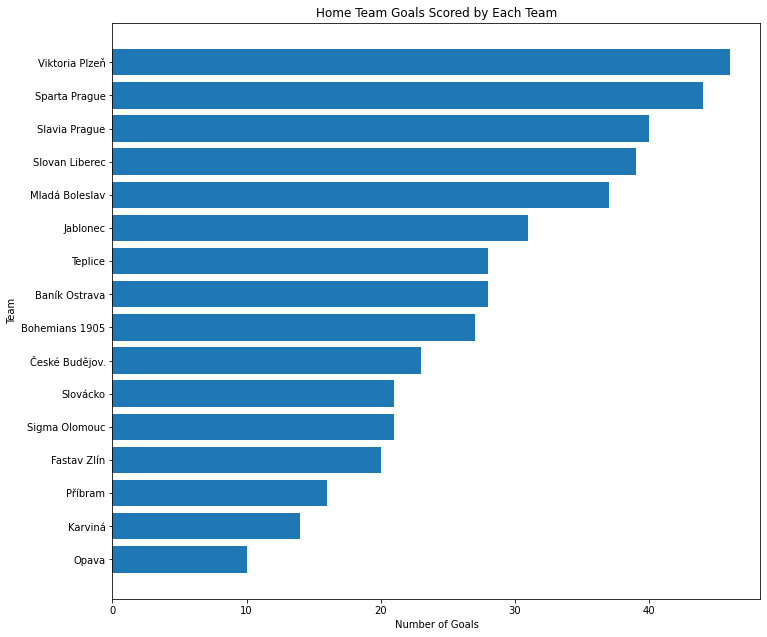

In [10]:
homebarplot1920 = Goals_summary(scores_clean, season1920[0], season1920[1]).barplot("Home Team Goals", vertical = False)

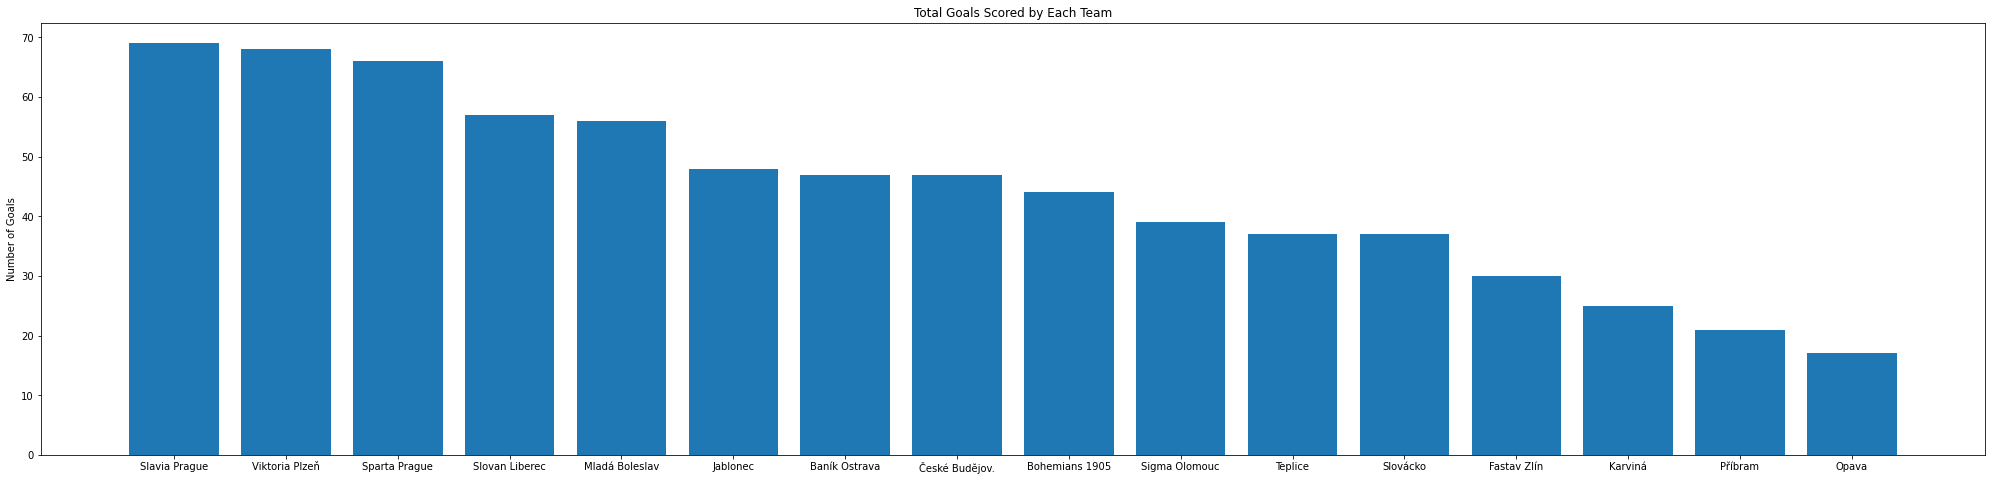

In [11]:
totalbarplot1920 = Goals_summary(scores_clean, season1920[0], season1920[1]).barplot("Total Goals")
totalbarplot1920

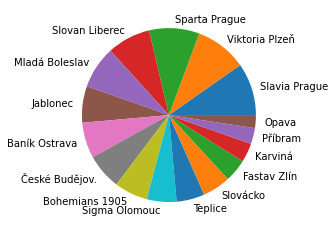

In [12]:
totalpiechart1920 = Goals_summary(scores_clean, season1920[0], season1920[1]).piechart("Total Goals")
totalpiechart1920

### Season 2015/2016

This is the oldest season in our data.

In [13]:
overall1516 = Goals_summary(scores_clean, season1516[0], season1516[1]).overall()
overall1516

Total Home Goals: 414
Total Away Goals: 262
Home and Away Goals Difference: 152
Total Goals: 676
Average Home Goals per Game: 1.73
Average Away Goals per Game: 1.09
Average Total Goals per Game: 1.41


We can notice a lower amount of total goals scored in this season than in 2019/2020, but the average number of goals per game is 0.1 higher. This can be caused by a different number of games played in each season. In 2019/2020 there were those "irregular" games in championship and relegation rounds.

In [14]:
total_pivot1516 = Goals_summary(scores_clean, season1516[0], season1516[1]).total_pivot()
total_pivot1516

,Home Team Goals,Away Team Goals,Total Goals
Team,,,
Mladá Boleslav,44,19,63
Sparta Prague,41,20,61
Viktoria Plzeň,32,25,57
Slovan Liberec,33,18,51
Slavia Prague,31,17,48
Jablonec,25,21,46
Dukla Prague,25,19,44
Slovácko,26,11,37
Zbrojovka Brno,23,14,37


In [15]:
ha_ratio_pivot1516 = Goals_summary(scores_clean, season1516[0], season1516[1]).ha_ratio_pivot()
ha_ratio_pivot1516

,Team,Home Team Goals,Away Team Goals,H/A Ratio
5,Sigma Olomouc,26,9,2.888889
6,Slovácko,26,11,2.363636
0,Mladá Boleslav,44,19,2.315789
10,Vysočina Jihlava,21,10,2.100000
1,Sparta Prague,41,20,2.050000
2,Slovan Liberec,33,18,1.833333
4,Slavia Prague,31,17,1.823529
9,Zbrojovka Brno,23,14,1.642857
11,Příbram,20,13,1.538462
7,Dukla Prague,25,19,1.315789


### All Seasons (2015/2016 - 2020/2021)

In [16]:
overall_all = Goals_summary(scores_clean, all_seasons[0], all_seasons[1]).overall()

Total Home Goals: 2107
Total Away Goals: 1481
Home and Away Goals Difference: 626
Total Goals: 3588
Average Home Goals per Game: 1.54
Average Away Goals per Game: 1.08
Average Total Goals per Game: 1.31


The long-term average number of goals scored at home is 0.46 higher than for goals scored away, which proves the advantage of playing on the home pitch that we included in the predicting function. 

In [17]:
home_pivot_all = Goals_summary(scores_clean, all_seasons[0], all_seasons[1]).home_pivot()
home_pivot_all

,Home Team Goals
Home Team,
Slavia Prague,194
Viktoria Plzeň,189
Sparta Prague,189
Jablonec,161
Mladá Boleslav,158
Slovan Liberec,151
Slovácko,117
Sigma Olomouc,105
Fastav Zlín,101


In [18]:
away_pivot_all = Goals_summary(scores_clean, all_seasons[0], all_seasons[1]).away_pivot()
away_pivot_all

,Away Team Goals
Away Team,
Slavia Prague,157
Viktoria Plzeň,120
Mladá Boleslav,115
Sparta Prague,114
Jablonec,113
Fastav Zlín,81
Bohemians 1905,80
Slovácko,79
Slovan Liberec,78


In [19]:
total_pivot_all = Goals_summary(scores_clean, all_seasons[0], all_seasons[1]).total_pivot()
total_pivot_all

,Home Team Goals,Away Team Goals,Total Goals
Team,,,
Slavia Prague,194,157,351
Viktoria Plzeň,189,120,309
Sparta Prague,189,114,303
Jablonec,161,113,274
Mladá Boleslav,158,115,273
Slovan Liberec,151,78,229
Slovácko,117,79,196
Fastav Zlín,101,81,182
Bohemians 1905,101,80,181


Slavia Prague obviously dominates the Czech league in the last seasons as they have most goals scored both home and away out of all teams.

In [20]:
ha_ratio_pivot_all = Goals_summary(scores_clean, all_seasons[0], all_seasons[1]).ha_ratio_pivot()
ha_ratio_pivot_all

,Team,Home Team Goals,Away Team Goals,H/A Ratio
20,FK Pardubice,11,5,2.200000
5,Slovan Liberec,151,78,1.935897
16,Vysočina Jihlava,55,32,1.718750
13,Příbram,85,50,1.700000
17,Opava,47,28,1.678571
2,Sparta Prague,189,114,1.657895
11,Dukla Prague,89,54,1.648148
1,Viktoria Plzeň,189,120,1.575000
6,Slovácko,117,79,1.481013
7,Sigma Olomouc,105,72,1.458333


The home/away ratio shows that some teams are more sensitive on where they play. Pardubice have scored 2.2 times more goals on their home pitch tahn what they scored away. This is a little bit of a paradox since Pardubice are new in the first league this season, and their home stadium is under construction, so they use the pitch from Bohemians 1905 as their home venue.

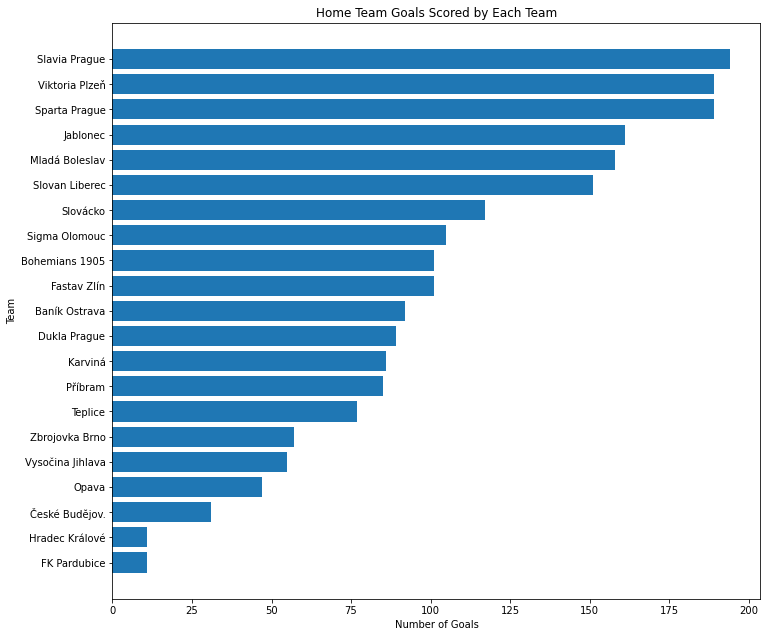

In [21]:
homebarh_all = Goals_summary(scores_clean, all_seasons[0], all_seasons[1]).barplot(stat = "Home Team Goals", vertical=False)
homebarh_all

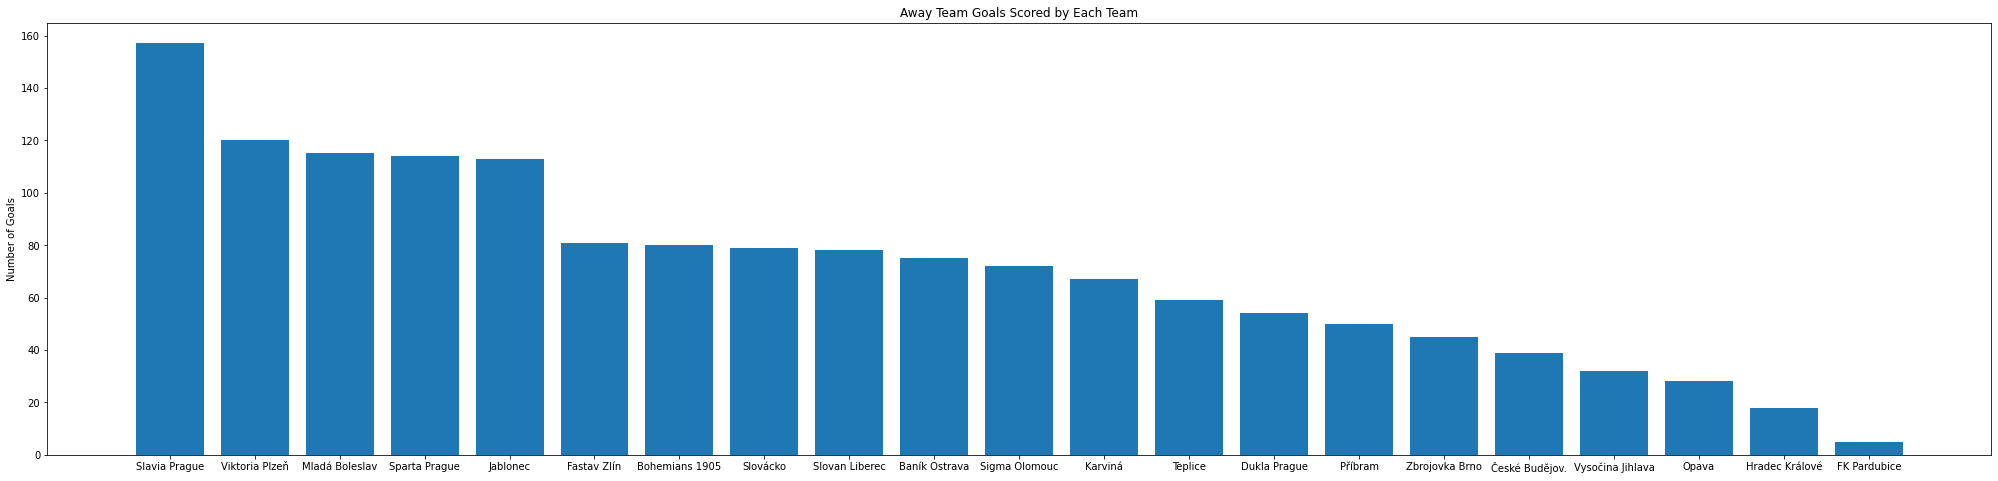

In [22]:
awaybar_all = Goals_summary(scores_clean, all_seasons[0], all_seasons[1]).barplot(stat = "Away Team Goals")
awaybar_all

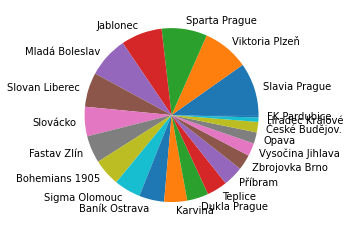

In [23]:
totalpie_all = Goals_summary(scores_clean, all_seasons[0], all_seasons[1]).piechart("Total Goals")
totalpie_all

Plotting the total numbers of goals scored in each season:

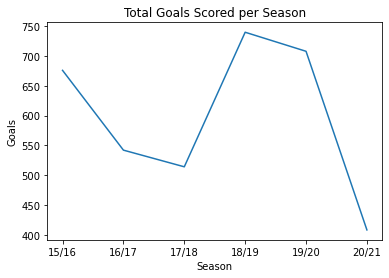

In [24]:
seasons_list = [season1516, season1617, season1718, season1819, season1920, season2021]
goals_per_season = []
for i in seasons_list:
    total_pivot = Goals_summary(scores_clean, i[0], i[1]).total_pivot()
    total_season_goals = sum(total_pivot["Total Goals"])
    goals_per_season.append(total_season_goals)
seasons_names = ["15/16", "16/17", "17/18", "18/19", "19/20", "20/21"]
plt.plot(seasons_names,goals_per_season)
plt.title('Total Goals Scored per Season')
plt.xlabel('Season')
plt.ylabel('Goals')
plt.show()

Plotting the mean numbers of goals scored in each season:

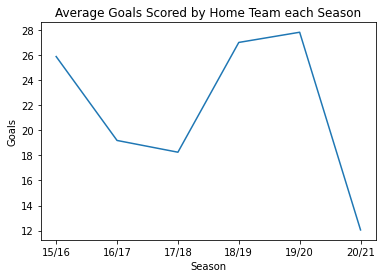

In [25]:
h_mean_goals = []
for i in seasons_list:
    home_pivot = Goals_summary(scores_clean, i[0], i[1]).home_pivot()
    h_mean_season_goals = sum(home_pivot["Home Team Goals"]) / len(home_pivot["Home Team Goals"])
    h_mean_goals.append(h_mean_season_goals)
plt.plot(seasons_names,h_mean_goals)
plt.title('Average Goals Scored by Home Team each Season')
plt.xlabel('Season')
plt.ylabel('Goals')
plt.show()

## Match Results

To analyze match results we built a class **Matches_summary** that takes a dataframe with scores and two dates like the first class. This class has a function **overall** which returns the number of games played and teams that participated in those games. The function **results_pivot** takes a logical argument **wins** indicating whether we want to receive a pivot table with wins or losses of all teams and returns a Pandas dataframe with the relevant values.

In [26]:
class Matches_summary:
    
    def __init__(self, scores_df, start_date, end_date):
        helping_data = scores_df.copy()
        helping_data['Date'] = pd.to_datetime(helping_data['Date'])
        mask = (helping_data['Date'] > start_date) & (helping_data['Date'] <= end_date)
        scores_clean = helping_data.loc[mask]
        winners = []
        losers = []
        for idx in range(0,scores_clean.shape[0]):
            if scores_clean.iloc[idx,:]['Home Team Goals'] > scores_clean.iloc[idx,:]['Away Team Goals']:
                winners.append(scores_clean.iloc[idx,:]['Home Team'])
                losers.append(scores_clean.iloc[idx,:]['Away Team'])
            elif scores_clean.iloc[idx,:]['Home Team Goals'] == scores_clean.iloc[idx,:]['Away Team Goals']:
                winners.append('Draw')
                losers.append('Draw')
            else:
                winners.append(scores_clean.iloc[idx,:]['Away Team'])
                losers.append(scores_clean.iloc[idx,:]['Home Team'])
        scores_win = scores_clean.copy()        
        scores_win['Winner'] = winners
        scores_win['Loser'] = losers
        self.scores_win = scores_win
       
    def overall(self):
        games = self.scores_win.shape[0]
        array = np.array(self.scores_win["Home Team"])
        unique = len(np.unique(array))
        print(f"{games} games were played in your specified time period.")
        print(f"{unique} different teams participated in those games.")
        
    def results_pivot(self, wins = True):
        if wins:
            index = 'Winner'
            by = 'Wins'
        else:
            index = 'Loser'
            by = 'Losses'
        r_pivot = self.scores_win.pivot_table(index=index, values='Home Team', aggfunc='count')
        r_pivot = pd.DataFrame(r_pivot)
        r_pivot['Team'] = r_pivot.index
        r_pivot[by] = r_pivot['Home Team']
        r_pivot = r_pivot.set_index('Team')
        r_pivot = r_pivot.sort_values(by = by, ascending = False)
        r_pivot_nice = pd.DataFrame(r_pivot.iloc[1:][by])
        return r_pivot_nice

### Current Season (2020/2021)

In [27]:
matches2021_overall = Matches_summary(scores_clean, season2021[0], season2021[1]).overall()
matches2021_overall

148 games were played in your specified time period.
18 different teams participated in those games.


In [28]:
matches2021_wins = Matches_summary(scores_clean, season2021[0], season2021[1]).results_pivot()
matches2021_wins

,Wins
Team,
Slavia Prague,14
Jablonec,11
Sparta Prague,11
Slovácko,9
Baník Ostrava,7
FK Pardubice,7
Viktoria Plzeň,7
Slovan Liberec,7
Sigma Olomouc,6


In [29]:
matches2021_losses = Matches_summary(scores_clean, season2021[0], season2021[1]).results_pivot(wins = False)
matches2021_losses

,Losses
Team,
Příbram,11
Zbrojovka Brno,10
Mladá Boleslav,10
Opava,10
Teplice,10
Fastav Zlín,8
Bohemians 1905,8
FK Pardubice,6
Karviná,6


Slavia Prague is not included in the pivot table above because they have not lost a single game this season.

### All Seasons (2015/2016 - 2020/2021)

In [30]:
all_matches_overall = Matches_summary(scores_clean, all_seasons[0], all_seasons[1]).overall()
all_matches_overall

1365 games were played in your specified time period.
21 different teams participated in those games.


In [31]:
winner_pivot = Matches_summary(scores_clean, all_seasons[0], all_seasons[1]).results_pivot()
winner_pivot

,Wins
Team,
Viktoria Plzeň,115
Slavia Prague,114
Sparta Prague,96
Jablonec,76
Slovan Liberec,74
Mladá Boleslav,66
Slovácko,57
Fastav Zlín,53
Bohemians 1905,52


Interestingly, Viktoria Plzeň has the highest number of wins in all analyzed seasons together, not Slavia Prague as we expected based on the rankings and numbers of goals.

In [32]:
loser_pivot = Matches_summary(scores_clean, all_seasons[0], all_seasons[1]).results_pivot(wins = False)
loser_pivot

,Losses
Team,
Příbram,84
Fastav Zlín,78
Karviná,68
Bohemians 1905,67
Baník Ostrava,67
Slovácko,66
Mladá Boleslav,61
Dukla Prague,59
Slovan Liberec,56


We can also visualize the pivot tables with wins and losses using a Matplotlib bar chart.

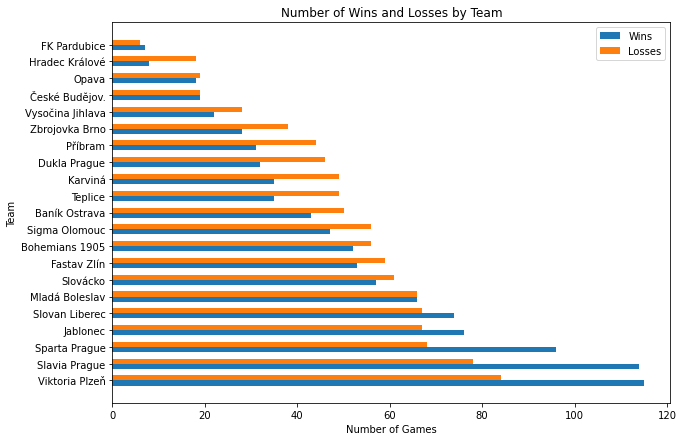

In [33]:
N = winner_pivot.shape[0]
blue_bar = winner_pivot["Wins"]
orange_bar = loser_pivot["Losses"]
ind = np.arange(N)
plt.figure(figsize=(10,7))
width = 0.3       
plt.barh(ind, blue_bar, width, label='Wins')
plt.barh(ind + width, orange_bar, width, label='Losses')
plt.ylabel('Team')
plt.xlabel('Number of Games')
plt.title('Number of Wins and Losses by Team')
plt.yticks(ind + width / 2, (winner_pivot.index))
plt.legend(loc='best')
plt.show()